<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

logistic regression --> classfication 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


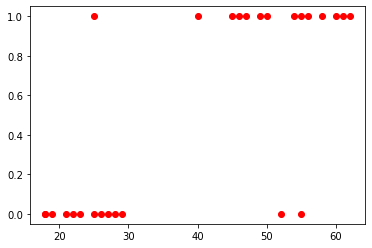

In [3]:
plt.scatter(df.age,df.bought_insurance,color='red')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [6]:
X_test

,age
20,21
14,49
11,28
22,40
1,25
10,18


In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [8]:
model.fit(X_train, y_train) # training step 

LogisticRegression()

In [9]:
model.score(X_train, y_train)

0.8571428571428571

In [10]:
model.score(X_test, y_test)

1.0

In [15]:
X_test

,age
2,47
19,18
7,60
26,23
3,52
13,29


In [11]:
y_predicted = model.predict(X_test)

In [12]:
X_test

,age
20,21
14,49
11,28
22,40
1,25
10,18


In [13]:
y_predicted

array([0, 1, 0, 1, 0, 0], dtype=int64)

In [25]:
model.predict([[39]])

array([0], dtype=int64)

In [32]:
model.predict_proba(X_test)

array([[0.7950055 , 0.2049945 ],
       [0.89850213, 0.10149787],
       [0.06578237, 0.93421763],
       [0.48513497, 0.51486503],
       [0.29218346, 0.70781654],
       [0.77512197, 0.22487803]])

In [37]:
model.predict_proba([[40]])

array([[0.48513497, 0.51486503]])

In [17]:
y_test.to_list()

[0, 0, 0, 0, 0]

In [68]:
counter = 0 
real = y_test.to_list()
for i in range(len(y_predicted)):
    if y_predicted[i] == real[i]:
        counter+=1

print(counter / len(y_predicted)  *100)
print(counter)

60.0
3


In [39]:
model.score(X_test,y_test)

1.0

In [40]:
model.score(X_train,y_train) # accuracy : train 

0.8571428571428571

In [24]:
y_predicted

array([0, 1, 1, 0, 0], dtype=int64)

In [25]:
X_test

,age
1,25
23,45
9,61
0,22
26,23


**model.coef_ indicates value of m in y=m*x + b equation**

In [38]:
model.coef_

array([[0.11790363]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [39]:
model.intercept_

array([-4.65666747])

**Lets defined sigmoid function now and do the math with hand**

In [43]:
import math
def sigmoid(y):
    return 1 / (1 + math.exp(-y))

In [44]:
def prediction_function(age):
    y = 0.1094324 * age -3.92618657 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    res = sigmoid(y)
    return res

In [45]:
age = 20
prediction_function(age)

0.14962585182902874

In [46]:
age = 43
prediction_function(age)

0.6855522150301104

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model